# Trabalho Final de Métodos Quantitativos
###### Pedro Henrique Ventura 
###### Aluno de Sistemas Multimídia da Pós Graduação em Ciência da Computação (2019). Terceiro Trimestre
## Bibliotecas

In [1]:
import scipy 
import math
import pylab
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.colors as mcolors

from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression

## Importação dos dados

### Uma primeira vizualização

In [2]:
# Vendo os atributos e seus respectivos tipos
df = pd.read_csv("googleplaystore.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
# uma primeira exibição
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
#algumas amostras estatísticas
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


FAMILY                 1746
GAME                   1097
TOOLS                   733
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         312
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64
9360


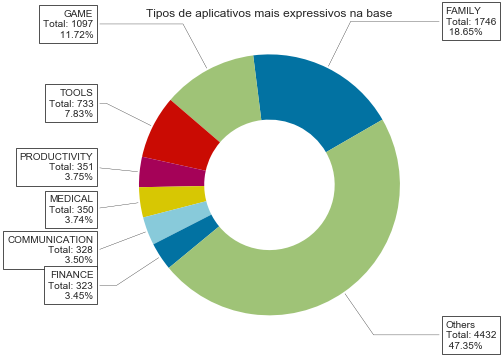

In [40]:
# plotando expressividade das classes de aplicativo

category = df.Category.value_counts()
print(category)
categoryName = df.Category.value_counts(sort = True).index
categoryValues = df.Category.value_counts(sort = True).values
totalC = np.sum(categoryValues)
totalOthers =  np.sum(categoryValues)- (categoryValues[0] + categoryValues[1] + categoryValues[2] +
                                 categoryValues[3]+categoryValues[4]+categoryValues[5]+categoryValues[6])
print(totalC)

# carregando os campos
labels = [categoryName[0]+"\nTotal: "+str(categoryValues[0])+"\n %.2f"%((categoryValues[0]/totalC)*100)+"%",
          categoryName[1]+"\nTotal: "+str(categoryValues[1])+"\n %.2f"%((categoryValues[1]/totalC)*100)+"%",
          categoryName[2]+"\nTotal: "+str(categoryValues[2])+"\n %.2f"%((categoryValues[2]/totalC)*100)+"%",
          categoryName[3]+"\nTotal: "+str(categoryValues[3])+"\n %.2f"%((categoryValues[3]/totalC)*100)+"%",
          categoryName[4]+"\nTotal: "+str(categoryValues[4])+"\n %.2f"%((categoryValues[4]/totalC)*100)+"%",
          categoryName[5]+"\nTotal: "+str(categoryValues[5])+"\n %.2f"%((categoryValues[5]/totalC)*100)+"%",
          categoryName[6]+"\nTotal: "+str(categoryValues[6])+"\n %.2f"%((categoryValues[6]/totalC)*100)+"%",
          "Others"+"\nTotal: "+str(totalOthers)+"\n %.2f"%((totalOthers/totalC)*100)+"%"]
data =  [categoryValues[0],categoryValues[1],categoryValues[2],categoryValues[3],categoryValues[4],categoryValues[5],categoryValues[6],totalOthers]

# Configurando o tamanho do gráfico
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=30)

bbox_props = dict(boxstyle="square,pad=0.4", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Tipos de aplicativos mais expressivos na base")

plt.show()

In [6]:
## análise de dados faltantes
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Tratamento da base
### Como pode ser visto, grande parte dos dados não estão como valores reais e possui alguns valores faltantes. Logo, precisamos fazer um tratamento para uma análise mais aprofundada.

In [7]:
## Remoção dos dados faltantes
df.dropna(inplace = True)
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [8]:
df.corr()

,Rating
Rating,1.0


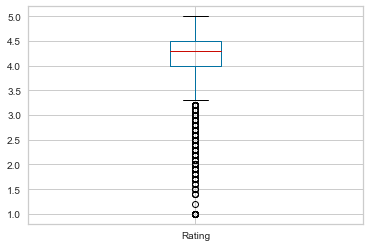

In [9]:
df.boxplot()